In [2]:
import pandas as pd
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from data_processing import DataIterator

# Data from Social Competition Task
[Download dataset](http://neurotycho.brain.riken.jp/download/base/20100803S1_Social+Competition_K2_Toru+Yanagawa_csv_ECoG128-Eye9-Motion22-Event3.zip)

In [3]:
data = pd.read_csv('../data/Eye-Motion/ECoG.csv', header=0)

## Формат данных
Данные представляют собой зависимость потенциалов в 128 точках мозга обезъяны от времени.   
Показатели снимаются каждую миллисекунду.  

Всего - 3697432 измерений

In [4]:
data_sample = data.loc[:1000, :"ECoG_ch6"]

In [5]:
data_sample.head()

,ECoG_time,ECoG_ch1,ECoG_ch2,ECoG_ch3,ECoG_ch4,ECoG_ch5,ECoG_ch6
0,0.000,-105,-126,-366,-375,110,-51
1,0.001,-125,-152,-307,-364,95,-89
2,0.002,-102,-160,-314,-377,158,-70
3,0.003,-109,-190,-347,-416,186,-68
4,0.004,-101,-175,-358,-418,203,-43


## Визуализация данных

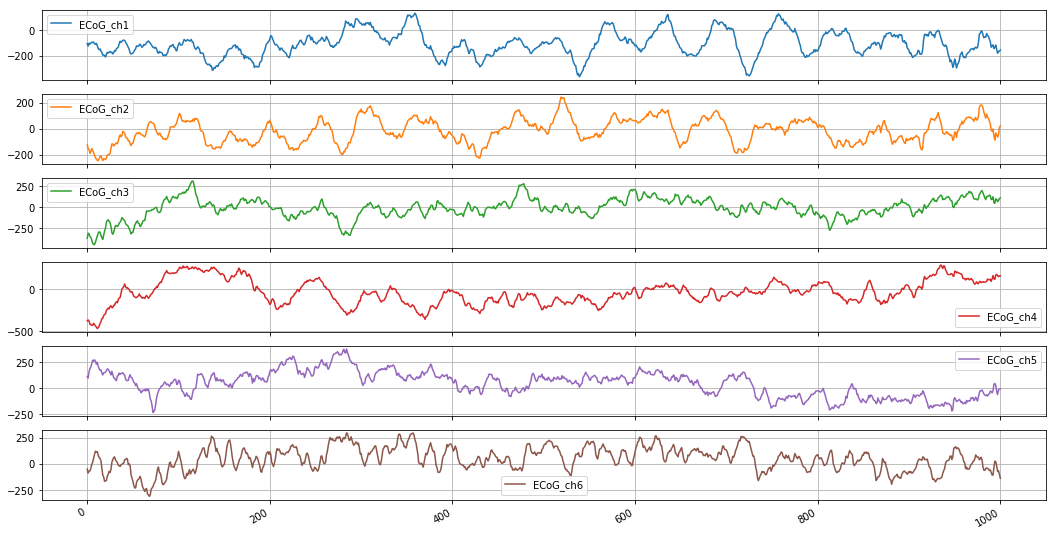

In [6]:
%matplotlib inline
data_sample.loc[:, "ECoG_ch1":].plot(subplots=True, figsize=(18, 10), grid=True);

## Проведем серию усреднений, чтобы посмотреть на тенденции измерения потенциалов
### Небольшое усреднение по трем, рядом лежащим, точкам

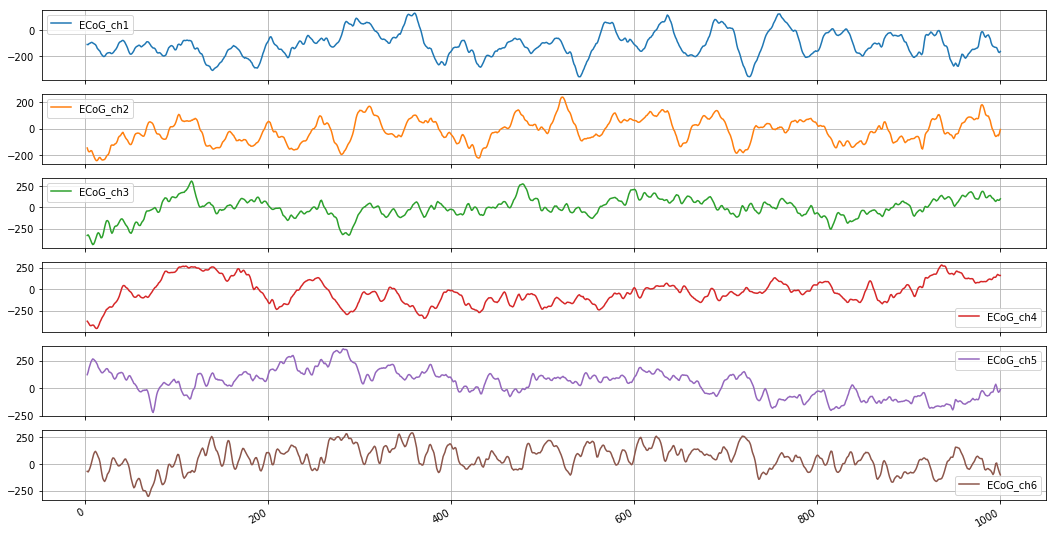

In [7]:
%matplotlib inline
data_sample.rolling(window=3).mean().loc[:, "ECoG_ch1":].plot(subplots=True, figsize=(18, 10), grid=True);

## Усреднение по 20 точкам

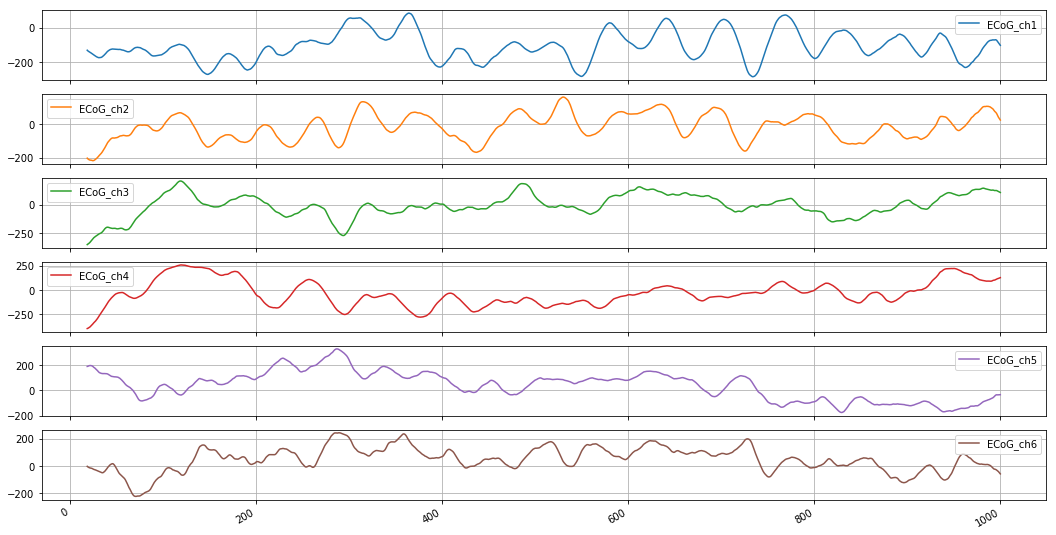

In [8]:
%matplotlib inline
data_sample.rolling(window=20).mean().loc[:, "ECoG_ch1":].plot(subplots=True, figsize=(18, 10), grid=True);

## Посмотрим на маленький отрезок данных

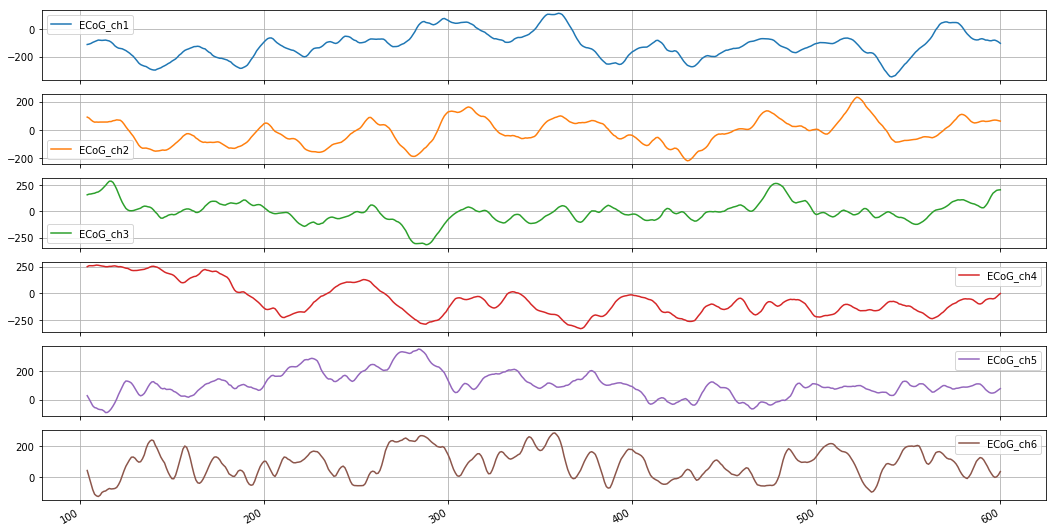

In [9]:
%matplotlib inline
data_sample.loc[100:600, "ECoG_ch1":].rolling(window=5).mean().loc[:, "ECoG_ch1":].plot(subplots=True, figsize=(18, 10), grid=True);

## Для большего количества измерений

In [10]:
data_sample = data.loc[:100000, :"ECoG_ch6"]

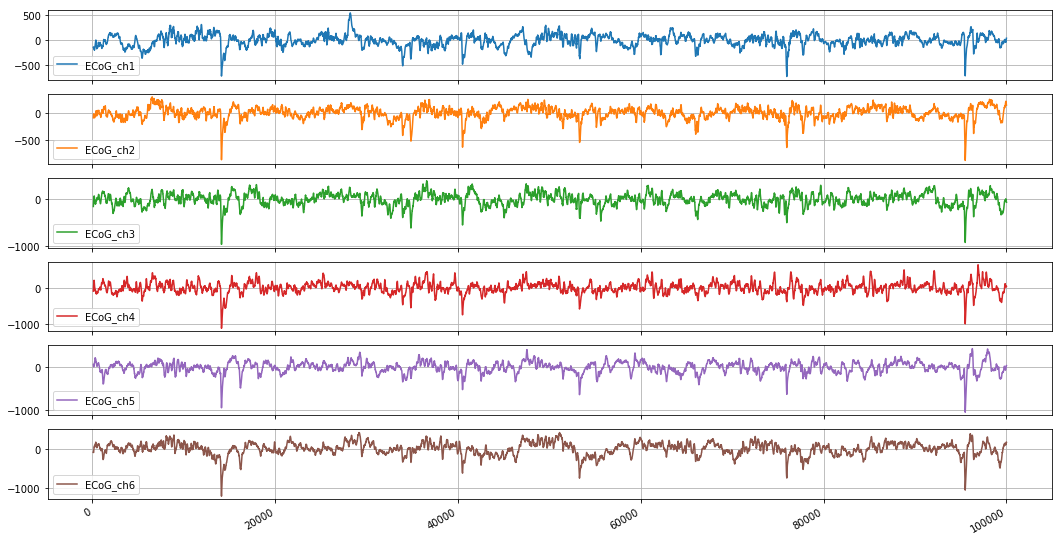

In [11]:
%matplotlib inline
data_sample.rolling(window=100).mean().loc[:, "ECoG_ch1":].plot(subplots=True, figsize=(18, 10), grid=True);

## Предположение
Можно попробовать два варианта разбиения временных рядом по 100 и по 300 точек.  
Так как в среднем, за этот период ряд претерпевает изменение значений в обе стороны.

In [13]:
#  Итератор для данных, ряды переманны
data_iter = DataIterator(data_sample, 100)

In [14]:
item = next(data_iter)

In [15]:
item

,ECoG_time,ECoG_ch1,ECoG_ch2,ECoG_ch3,ECoG_ch4,ECoG_ch5,ECoG_ch6
83300,83.300,-57,54,29,-129,219,-27
83301,83.301,-73,60,46,-165,198,-14
83302,83.302,-39,68,79,-158,215,-10
83303,83.303,-35,44,75,-175,208,-1
83304,83.304,-49,20,49,-200,212,-18
83305,83.305,-60,3,23,-255,222,-31
83306,83.306,-41,33,39,-272,236,-13
83307,83.307,-59,18,-7,-314,207,-32
83308,83.308,-66,20,-35,-330,194,-9
83309,83.309,-74,15,-50,-348,193,2
